In [1]:
from google.cloud import vision
import os

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="creds.json"

In [3]:
client = vision.ImageAnnotatorClient()

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

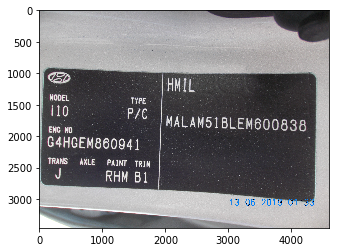

In [29]:
import io

path = './Vin_number_internship/DSCN4423.JPG'
with io.open(path, 'rb') as image_file:
        content = image_file.read()
image_data = cv2.imread(path)
# plt.imshow(image_data)

## Manual Preprocessing

In [30]:
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9, 3))
sqKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

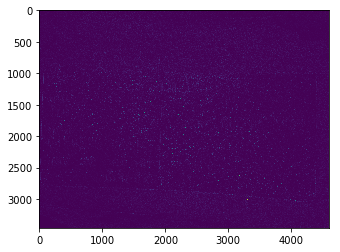

In [31]:
gray = cv2.cvtColor(image_data, cv2.COLOR_BGR2GRAY)
# sobel = cv2.Sobel(gray,ddepth=cv2.CV_32F, dx=1, dy=0)
tophat = cv2.morphologyEx(gray, cv2.MORPH_TOPHAT, rectKernel)
plt.imshow(tophat)
tophat=tophat.tobytes()
# sobel = sobel.tobytes()


~Creating Google Vision API Object for Image~

In [32]:
im_object = vision.types.Image(content=content)

~Fetching Response from the API

In [33]:
response = client.text_detection(image=im_object)
texts = response.text_annotations

In [49]:
save_text = []
for text in texts:
#         print('\n"{}"'.format(text.description))
        save_text.append(text.description)
        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in text.bounding_poly.vertices])

#         print('bounds: {}'.format(','.join(vertices)))


"HMIL
NODEL
10
ENG NO
G4HGEM860941
TRANS AXLE PAINT TRIM
TYPE
PCMALAM51BLEM600838
RHM B1
13.06.2018 01:33
"

"HMIL"

"NODEL"

"10"

"ENG"

"NO"

"G4HGEM860941"

"TRANS"

"AXLE"

"PAINT"

"TRIM"

"TYPE"

"PCMALAM51BLEM600838"

"RHM"

"B1"

"13.06.2018"

"01:33"


In [50]:
def count_alpha_n_digs(text):
    dig_count = 0
    alpha_count = 0
    for char in text:
        if char.isalpha():
            alpha_count = alpha_count+1
        if char.isdigit():
            dig_count = dig_count+1
    
    return dig_count,alpha_count

~Since Images are too noisy and result from OCR may generate spaces between VIN, therefore using bruteforce instead of regex for detecting favourble VIN text and not going for only 17 char length alphanumeric word.~

In [53]:
possibles_matches = []
for ix in range(1,len(save_text)):
    tmp = save_text[ix]
    digs,alps = count_alpha_n_digs(tmp)
    if len(tmp) >= 17:
        if digs >0 and alps >0:
            possibles_matches=[]
            possibles_matches.append({'Text':tmp,'digits':digs,'alphas':digs})
            print('VIN : '+tmp)
            break
    if digs >=2 and alps >= 2:
        possibles_matches.append({'Text':tmp,'digits':digs,'alpha':alps})
    
    

VIN : PCMALAM51BLEM600838


In [54]:
for match in possibles_matches:
    print(match)

{'digits': 8, 'Text': 'PCMALAM51BLEM600838', 'alphas': 8}


True